# Are you Chinese, Japanese or Korean?

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 16

In [4]:
path = Path('ethnic_data')

In [6]:
path.ls()

[PosixPath('ethnic_data/Japanese'),
 PosixPath('ethnic_data/Korean'),
 PosixPath('ethnic_data/Chinese')]

In [7]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, bs=bs)
data.normalize(imagenet_stats)

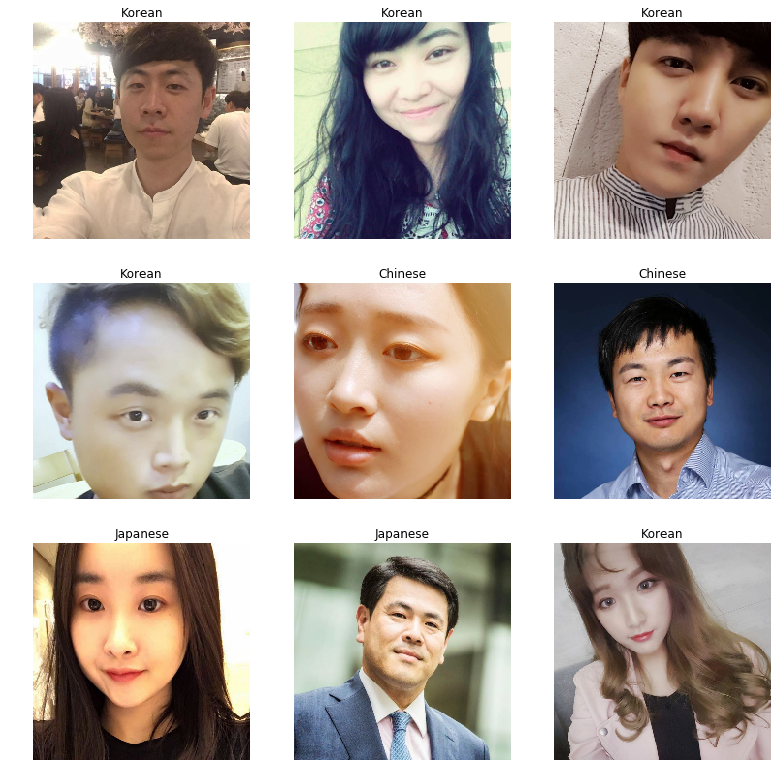

In [8]:
data.show_batch(rows=3, figsize=(11,11))

In [9]:
print(data.classes)
len(data.classes),data.c

['Chinese', 'Japanese', 'Korean']


(3, 3)

In [10]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [11]:
learn.fit_one_cycle(20)

Total time: 02:06
epoch  train_loss  valid_loss  accuracy
1      1.166336    0.880884    0.604167  (00:10)
2      0.965234    0.838434    0.708333  (00:06)
3      0.848008    0.786278    0.677083  (00:06)
4      0.793763    0.990891    0.666667  (00:06)
5      0.719069    0.999179    0.666667  (00:06)
6      0.621538    1.050247    0.697917  (00:06)
7      0.552556    0.861917    0.750000  (00:06)
8      0.494678    0.892185    0.677083  (00:06)
9      0.420421    0.920410    0.687500  (00:06)
10     0.377652    0.812420    0.729167  (00:06)
11     0.326353    0.919904    0.708333  (00:06)
12     0.269668    0.964383    0.687500  (00:06)
13     0.237575    0.894636    0.708333  (00:06)
14     0.190646    0.951296    0.687500  (00:06)
15     0.161423    0.999738    0.677083  (00:06)
16     0.151099    0.954518    0.718750  (00:06)
17     0.143262    0.942115    0.708333  (00:06)
18     0.118369    0.948530    0.677083  (00:06)
19     0.125031    0.981311    0.697917  (00:06)
20     0.11

In [12]:
learn.save('model_resnet50')

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(1)

Total time: 00:09
epoch  train_loss  valid_loss  accuracy
1      1.956771    3.105902    0.375000  (00:09)



In [15]:
learn.load('model_resnet50')

In [19]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


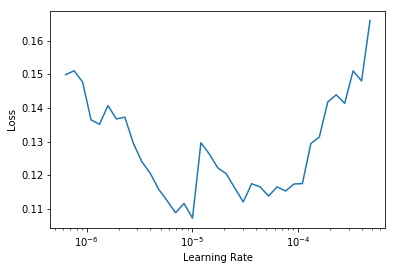

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-5))

Total time: 02:36
epoch  train_loss  valid_loss  accuracy
1      0.116438    0.964154    0.687500  (00:07)
2      0.110585    0.936195    0.697917  (00:07)
3      0.135506    0.935321    0.697917  (00:07)
4      0.123198    0.951124    0.687500  (00:07)
5      0.130986    0.956728    0.697917  (00:07)
6      0.120706    0.949133    0.708333  (00:07)
7      0.102981    0.913406    0.697917  (00:07)
8      0.093419    0.921224    0.718750  (00:07)
9      0.087621    0.922553    0.718750  (00:07)
10     0.091972    0.909990    0.718750  (00:07)
11     0.077478    0.904493    0.718750  (00:07)
12     0.074865    0.909927    0.708333  (00:07)
13     0.072657    0.885772    0.729167  (00:07)
14     0.079452    0.876605    0.729167  (00:07)
15     0.069898    0.898917    0.718750  (00:08)
16     0.076653    0.885099    0.718750  (00:07)
17     0.072486    0.888361    0.729167  (00:07)
18     0.060909    0.882119    0.718750  (00:07)
19     0.069028    0.902850    0.718750  (00:07)
20     0.07

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

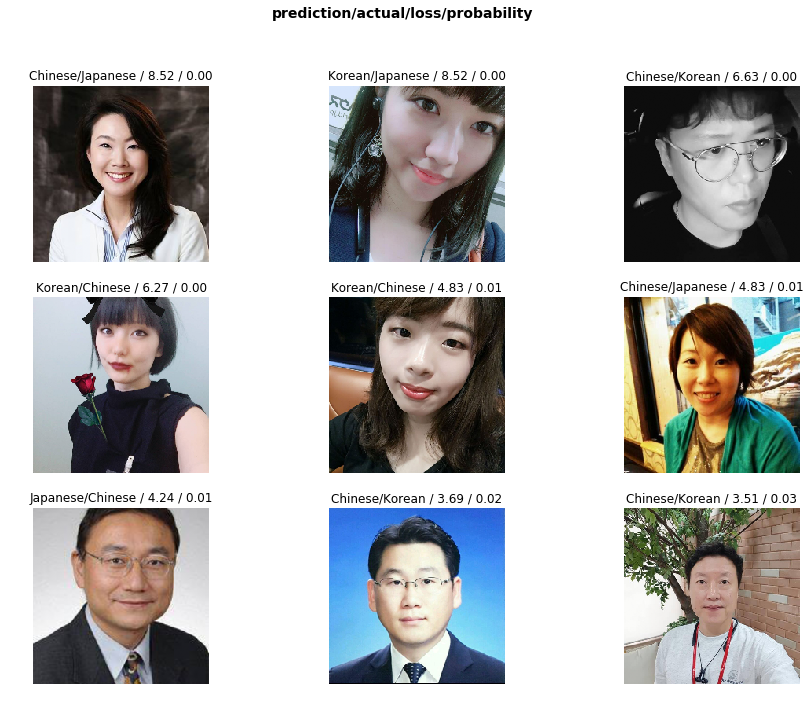

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

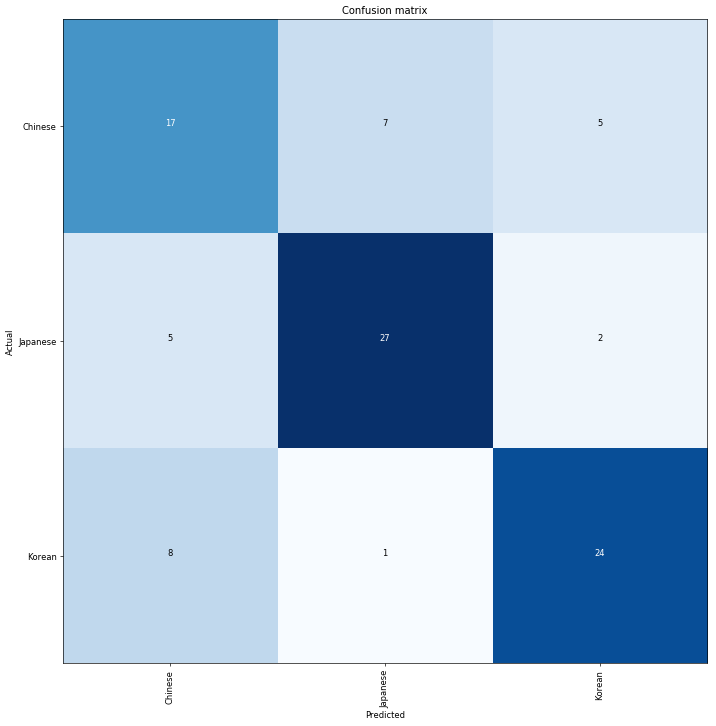

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
interp.most_confused(min_val=2)

[('Korean', 'Chinese', 8),
 ('Chinese', 'Japanese', 7),
 ('Chinese', 'Korean', 5),
 ('Japanese', 'Chinese', 5)]